<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 30px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Datos No Estructurados: NLP</h1>
        <h2 style="color: white; text-align: center;">Fake News Detection</h2>
    </div>

</div>


<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">Realizado por:</h3>
</div>

- Álvaro Ezquerro Pérez
- María Calvo de Mora Román
- Celia Quiles Alemañ


<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 10px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">NLP con Modelos de Machine Learning</h1>
    </div>
</div>


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Introducción</h2>
</div>


En este notebook, exploraremos la posibilidad de realizar Procesamiento de Lenguaje Natural (NLP) utilizando modelos de machine learning. 

Empezamos con una introducción a los conceptos básicos del NLP, incluyendo la tokenización, la eliminación de stopwords, la extracción de características y la construcción de modelos de machine learning para nuestra tarea específica, la identificación de fake news.

Utilizaremos bibliotecas populares como NLTK, scikit-learn y pandas para llevar a cabo diferentes etapas del proceso de NLP. Exploraremos diversos algoritmos de machine learning, como la Regesión Logística, Support Vector Machines (SVM) o Random Forests, entre otros, para abordar nuestro problema de clasificación de texto.

A lo largo de este notebook, no solo aprenderemos cómo implementar estos modelos, sino también cómo evaluar su rendimiento y ajustar sus parámetros para obtener resultados óptimos.

En futuros notebooks, nos sumergiremos aún más en el campo del NLP, explorando técnicas avanzadas como el uso de redes neuronales profundas para abordar nuestra tarea de NLP.

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Preprocesado de datos para NLP:</h2>
</div>

En el proceso de identificación de noticias falsas, es fundamental **preprocesar el texto** de manera adecuada para mejorar la calidad de los datos y aumentar la precisión del modelo. Para lograr esto, vamos a implementar una **función de preprocesamiento que incluye el algoritmo de stemming utilizando el Porter Stemmer.**

El objetivo principal del stemming es reducir las palabras a su forma base, lo que nos permite agrupar palabras similares y simplificar el vocabulario. Al **eliminar sufijos y prefijos de las palabras**, el stemming ayuda a normalizar el texto y a capturar mejor la esencia semántica de las palabras, lo que es esencial para identificar patrones y características relevantes en el análisis de texto. [1]

La función de preprocesamiento **comenzará eliminando cualquier caracter que no sea una letra del alfabeto**, convirtiendo todo el **texto a minúsculas** y **dividiéndolo en palabras individuales**. Luego, aplicaremos el **algoritmo de stemming** para reducir cada palabra a su forma base, asegurándonos de que **no se incluyan palabras vacías (stopwords)** en el proceso.

Este enfoque de preprocesamiento nos permitirá mejorar la calidad de los datos al reducir la variabilidad léxica y normalizar el texto, lo que a su vez aumentará la eficacia de nuestro modelo en la identificación de noticias falsas. Al proporcionar una representación más coherente y estructurada del texto, el uso de stemming contribuirá significativamente a la precisión y fiabilidad de nuestro sistema de detección de noticias falsas.

Es decir, la función hará:
1) Quita caracteres que no contenga el alfabeto
2) Pasa a minúsculas todo el texto
3) Divide el texto en palabras individuales
4) Stemming  para quitar prefijos/ sufijos
5) Elimina stopwords



### *Si se desea profundizar en este preprocesado, acuda al notebook `2.Preprocess_for_NLP.ipynb`.*


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns


import joblib

In [2]:
df = pd.read_csv('../data/df_preprocessed.csv')
df.head()

,contenido,fake
0,fake news updat newsweek report caught lie tru...,1
1,britain may parti leader agre tackl sexual har...,0
2,secret dump toxic wast privat properti epa gov...,1
3,yemen houthi say shot u surveil drone state ne...,0
4,japan aso retract hitler comment critic tokyo ...,0


*Este preprocesado tarda unos minutos. En consecuencia, para no tener que ejecutar este paso cada vez, los textos tras ser preprocesados han sido guardados y ahora solo los cargamos en el notebook de vuelta.*

##### Split entre X e y + Vectorización del texto:

Una vez el texto tiene esos arreglos realizados, pasamos a separar entre target del problema (columna `fake`, será la `y` del problema), y cuál será el input (columna `contenido`, será la `X`del problema).


Además, la `X` al ser una columna de texto, tendremos que transformarla en numérica para su futuro procesamiento.

Para ello, utilizamos la función `TfidfVectorizer()`. 

El TfidfVectorizer() es una técnica comúnmente utilizada en el procesamiento de lenguaje natural (NLP) para convertir texto en representaciones numéricas que son adecuadas para su uso en modelos de aprendizaje automático. "Tfidf" significa "Term Frequency-Inverse Document Frequency", que son los componentes clave de este método. [2]

Al utilizar TfidfVectorizer(), transformamos el texto de la columna de entrada (en este caso, la columna 'contenido' que contiene el texto de las noticias) en una representación numérica que captura la importancia relativa de cada palabra en cada documento. Esto es esencial para alimentar los datos de texto a un modelo de aprendizaje automático, ya que los modelos generalmente requieren entradas numéricas. Además, el uso de TF-IDF ayuda a resaltar las palabras más relevantes y distintivas en el conjunto de datos, lo que puede mejorar el rendimiento del modelo.

In [3]:
X = df['contenido'].values
y = df['fake'].values

In [4]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

#joblib.dump(vector, '../models/vectorizer.pkl')

In [5]:
print(X)

  (0, 88056)	0.03579370594577725
  (0, 87936)	0.020485408141658
  (0, 86551)	0.02594193454061605
  (0, 83998)	0.02941898422052584
  (0, 82109)	0.05571567166113982
  (0, 80447)	0.024472568683583322
  (0, 80280)	0.0630846182271232
  (0, 80220)	0.11357745798628796
  (0, 79543)	0.151059890252117
  (0, 79263)	0.05740222890919985
  (0, 78932)	0.05010149088805788
  (0, 77960)	0.04402183596408137
  (0, 77843)	0.03932706101291844
  (0, 77835)	0.09413403705072855
  (0, 77773)	0.03197940626213781
  (0, 77663)	0.040656629140327444
  (0, 77546)	0.056647374718338354
  (0, 75148)	0.04473065243589399
  (0, 75065)	0.09838735404610206
  (0, 74218)	0.03622279303171761
  (0, 74043)	0.030878812701788116
  (0, 72978)	0.05674570466243637
  (0, 72771)	0.03633442847304376
  (0, 71321)	0.027213127820568547
  (0, 71288)	0.05400282526750075
  :	:
  (44896, 11244)	0.06645845820347505
  (44896, 11243)	0.03598038763975178
  (44896, 6206)	0.052887469268062995
  (44896, 3961)	0.04406731534350405
  (44896, 3935)	0.0743

Como se aprecia, gracias a esta última transformación ya tenemos el texto vectorizado y listo para el análisis.

##### Split entre train y test:

Hemos decidido que vamos a entrenar con el 80% de los registros, y usaremos como conjunto de prueba el 20% restante.
Además, realizamos esta división de manera estratificada, para que train y test tengan la misma proporción de fake news.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    stratify=y, 
                                                    random_state=999)

<div style="padding: 25px;">
    <h2 style="color: #1e355f; font-weight: bold;">--- MODELIZACIÓN CON MACHINE LEARNING ---</h2>
</div>

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Regresión Logística</h2>
</div>

En esta sección, exploraremos la Regresión Logística como uno de los modelos fundamentales de Machine Learning para abordar nuestra tarea de identificación de fake news. La Regresión Logística es un algoritmo de clasificación que se utiliza ampliamente en diversos campos, incluyendo el análisis de datos y la minería de texto.

#### ¿Qué es la Regresión Logística?

A pesar de su nombre, la Regresión Logística es un algoritmo de clasificación, no de regresión. Utiliza la función logística (también conocida como función sigmoide) para modelar la probabilidad de que una observación pertenezca a una clase en particular. La salida de la regresión logística es una probabilidad en el rango [0, 1], que luego se puede convertir en una predicción de clase binaria utilizando un umbral específico, en nuestro caso este umbral será 0,5. [3]



In [7]:
# ----------------------
# --- REGRESIÓN LOG. ---
# ----------------------

reg_log = LogisticRegression()
reg_log.fit(X_train,Y_train)
#joblib.dump(reg_log, '../models/reg_log.pkl')

LogisticRegression()

In [8]:
# ---------------------------
# -- ACCURACY TRAIN & TEST --
# ---------------------------
train_y_pred_reg_log = reg_log.predict(X_train)
testing_y_pred_reg_log = reg_log.predict(X_test)

print(f'Accuracy sobre el cjto de train: {round(accuracy_score(train_y_pred_reg_log,Y_train),4)}')
print(f'Accuracy sobre el cjto de test: {round(accuracy_score(testing_y_pred_reg_log,Y_test),4)}')


Accuracy sobre el cjto de train: 0.992
Accuracy sobre el cjto de test: 0.9879


Un inciso sobre las predicciones que se obtienen. Como vemos a continuación consisten en 0s y 1s, siendo `1 = fake new` y `0 = real new`.

In [9]:
train_y_pred_reg_log

array([0, 0, 0, ..., 1, 0, 1])

In [10]:
# ---------------------------
# -- CLASSIFICATION REPORT --
# ---------------------------

log_reg_report=classification_report(testing_y_pred_reg_log,Y_test,target_names=['Fake','Real'])
print(log_reg_report)

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4283
        Real       0.99      0.99      0.99      4697

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [11]:
# ---------------------------
# ---- CONFUSSION MATRIX ----
# ---------------------------

print('-- Matriz Confusión Train: --')
print ([['TP', 'FP'],['FN', 'TN']])
print (confusion_matrix(Y_train, train_y_pred_reg_log,))
print("")

print('-- Matriz Confusión Test: --')
print ([['TP', 'FP'],['FN', 'TN']])
print(confusion_matrix(Y_test, testing_y_pred_reg_log,))

-- Matriz Confusión Train: --
[['TP', 'FP'], ['FN', 'TN']]
[[17012   121]
 [  168 18617]]

-- Matriz Confusión Test: --
[['TP', 'FP'], ['FN', 'TN']]
[[4229   55]
 [  54 4642]]


Con este primer modelo, ya con una simple regresión logística se obtiene una accuracy de hasta un 99% tanto en el conjunto de entrenamiento como en el conjunto de test.

En concreto, centrándonos en los datos del conjunto del test, datos que el modelo no había visto anteriormente, acertamos en 8871 noticias de las 8980 totales.

De entre las 109 falladas, 54 de ellas eran noticias fake que hemos considerado reales (el peor de los fallos), y las 55 restantes eran noticias reales pero que hemos categorizado como fake.

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Random Forest</h2>
</div>

En esta sección, exploraremos el algoritmo de Random Forest como una poderosa técnica de aprendizaje supervisado para abordar nuestra tarea de identificación de fake news. El Random Forest es una extensión del concepto de árboles de decisión, que combina múltiples árboles de decisión para mejorar la precisión y la generalización del modelo.

#### ¿Qué es Random Forest?

Random Forest es un algoritmo de aprendizaje supervisado que se basa en el ensamblaje de múltiples árboles de decisión. Cada árbol de decisión se entrena con una muestra aleatoria del conjunto de datos y utiliza una selección aleatoria de características en cada división de nodo. Finalmente, la predicción de clase se obtiene promediando las predicciones de todos los árboles (en el caso de clasificación) o tomando la media (en el caso de regresión). [4]

#### Aplicación en Identificación de Fake News:

En nuestro contexto, Random Forest puede ser utilizado para predecir si un artículo de noticias es genuino o falso basándose en un conjunto de características relevantes extraídas del texto. Al combinar múltiples árboles de decisión entrenados en diferentes subconjuntos de datos y características, Random Forest tiene la capacidad de capturar patrones complejos y mejorar la precisión del modelo en comparación con un solo árbol de decisión.

In [12]:
# ----------------------
# --- RANDOM FOREST ----
# ----------------------

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

#joblib.dump(rf, '../models/random_forest.pkl')

RandomForestClassifier()

In [13]:
# ---------------------------
# -- ACCURACY TRAIN & TEST --
# ---------------------------
train_y_pred_rf = rf.predict(X_train)
testing_y_pred_rf = rf.predict(X_test)

print(f'Accuracy sobre el cjto de train: {round(accuracy_score(train_y_pred_rf,Y_train),4)}')
print(f'Accuracy sobre el cjto de test: {round(accuracy_score(testing_y_pred_rf,Y_test),4)}')


Accuracy sobre el cjto de train: 1.0
Accuracy sobre el cjto de test: 0.992


In [14]:
# ---------------------------
# -- CLASSIFICATION REPORT --
# ---------------------------

rf_report=classification_report(testing_y_pred_rf,Y_test,target_names=['Fake','Real'])
print(rf_report)

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4270
        Real       0.99      0.99      0.99      4710

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [15]:
# ---------------------------
# ---- CONFUSSION MATRIX ----
# ---------------------------

print('-- Matriz Confusión Train: --')
print ([['TP', 'FP'],['FN', 'TN']])
print (confusion_matrix(Y_train, train_y_pred_rf,))
print("")

print('-- Matriz Confusión Test: --')
print ([['TP', 'FP'],['FN', 'TN']])
print(confusion_matrix(Y_test, testing_y_pred_rf,))

-- Matriz Confusión Train: --
[['TP', 'FP'], ['FN', 'TN']]
[[17133     0]
 [    0 18785]]

-- Matriz Confusión Test: --
[['TP', 'FP'], ['FN', 'TN']]
[[4241   43]
 [  29 4667]]


Muy similarmente a lo que ya ocurría en el primer modelo, (la regresión logística), obtenemos una accuracy de hasta un 99%  en el conjunto de test, mientras que en el conjunto de entrenamiento no se comete ningún error.


En concreto, centrándonos en los datos del conjunto del test, datos que el modelo no había visto anteriormente, acertamos en 8908 noticias de las 8980 totales.

De entre las 53 falladas, 29 de ellas eran noticias fake que hemos considerado reales (el peor de los fallos), y las 43 restantes eran noticias reales pero que hemos categorizado como fake.

###### Feature Importances:

Random Forest permite obtener qué palabras son aquellas que mayor repercusión tienen en la clasificación ejecutada.

Veamos qué palabras cobran más importancia:

In [22]:
# Obtener las importancias de las características
importances = rf.feature_importances_

# Obtener los nombres de las características (palabras)
feature_names = vector.get_feature_names_out()

# Crear un DataFrame para mostrar las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las 20 características más importantes
print(feature_importance_df.head(20))

          Feature  Importance
65239      reuter    0.064135
67558        said    0.042386
83424       video    0.021617
83348         via    0.020792
35056        imag    0.010649
84745       watch    0.009165
24740      featur    0.008781
84693  washington    0.007404
49701      minist    0.006010
41405        know    0.005793
14709         com    0.005655
79939     tuesday    0.005633
82293          us    0.004356
77773    thursday    0.004226
33909        http    0.004015
63900        read    0.004010
28200       getti    0.003938
641        actual    0.003835
2562      america    0.003731
44267        like    0.003725


Estas son las palabras que más importan a la hora de identificar que una noticia es fake o no. 

- Destaca la palabra `reuters` relativa al periódico del que provienen las noticias reales. Tiene sentido que, en caso de nombrarse el periódico, solo se nombre en las noticias que provienen de él.

- También destacan otras palabras que, de primeras, se esperaría que no marcaran gran diferencia. Algunos ejemplos son: `video`, `imag` o `watch`.

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">SVM</h2>
</div>

En esta sección, exploraremos el algoritmo de Support Vector Machines (SVM) como una técnica poderosa de aprendizaje supervisado para abordar nuestra tarea de identificación de fake news. SVM es un modelo de clasificación que encuentra el hiperplano óptimo que maximiza la separación entre clases en un espacio dimensionalmente superior.

#### ¿Qué es Support Vector Machines (SVM)?

Support Vector Machines es un algoritmo de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. En el caso de clasificación, SVM busca encontrar el hiperplano óptimo que maximiza la separación entre las clases. [5]

In [26]:
# ----------------------
# -------- SVM ---------
# ----------------------

model_svm = svm.SVC(kernel='linear') # kernel lineal
model_svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
# ---------------------------
# -- ACCURACY TRAIN & TEST --
# ---------------------------
train_y_pred_svm = model_svm.predict(X_train)
testing_y_pred_svm = model_svm.predict(X_test)

print(f'Accuracy sobre el cjto de train: {round(accuracy_score(train_y_pred_svm,Y_train),4)}')
print(f'Accuracy sobre el cjto de test: {round(accuracy_score(testing_y_pred_svm,Y_test),4)}')


Accuracy sobre el cjto de train: 0.9979
Accuracy sobre el cjto de test: 0.9948


In [28]:
# ---------------------------
# -- CLASSIFICATION REPORT --
# ---------------------------

svm_report=classification_report(testing_y_pred_svm,Y_test,target_names=['Fake','Real'])
print(svm_report)

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4287
        Real       0.99      1.00      0.99      4693

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [29]:
# ---------------------------
# ---- CONFUSSION MATRIX ----
# ---------------------------

print('-- Matriz Confusión Train: --')
print ([['TP', 'FP'],['FN', 'TN']])
print (confusion_matrix(Y_train, train_y_pred_svm,))
print("")

print('-- Matriz Confusión Test: --')
print ([['TP', 'FP'],['FN', 'TN']])
print(confusion_matrix(Y_test, testing_y_pred_svm,))

-- Matriz Confusión Train: --
[['TP', 'FP'], ['FN', 'TN']]
[[17107    26]
 [   50 18735]]

-- Matriz Confusión Test: --
[['TP', 'FP'], ['FN', 'TN']]
[[4262   22]
 [  25 4671]]


Muy similarmente a lo que ya ocurría en los anteriores modelos, obtenemos una accuracy de hasta un 99% tanto en el conjunto de entrenamiento como en el conjunto de test.


En concreto, centrándonos en los datos del conjunto del test, datos que el modelo no había visto anteriormente, acertamos en 8933 noticias de las 8980 totales.

De entre las 47 falladas, 25 de ellas eran noticias fake que hemos considerado reales (el peor de los fallos), y las 22 restantes eran noticias reales pero que hemos categorizado como fake.

<div style="padding: 25px;">
    <h2 style="color: #1e355f; font-weight: bold;">--- COMPARACIÓN ENTRE MODELOS ---</h2>
</div>

Para finalizar este notebook, procedemos a comparar los 3 modelos entrenados de Machine Learning para nuestra tarea.

Para realizar esta tarea, **comparamos las accuracys** (porcentaje de acierto) obtenidas con cada uno de los modelos, tanto sobre el conjunto de entrenamiento, como sobre el conjunto de test.

En segundo lugar, también compararemos sus **valores de `Errores tipo II: Falsos negativos (FN)`,** esto hace referencia a cuántas fake news no hemos sido capaces de detectar. Esta métrica cobra importancia en esta tarea dado que precisamente este es nuestro objetivo, identificar qué noticia es fake para así no creerla (es más grave este error que el contrario, el que ocurriría al tachar de fake new una noticia verídica).

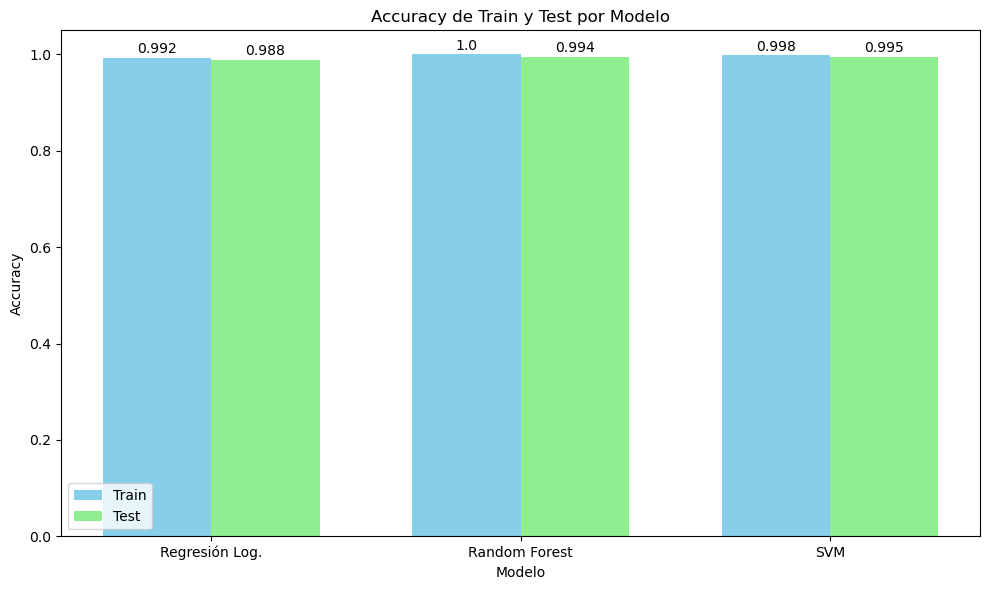

In [30]:
import matplotlib.pyplot as plt

# Modelos
modelos = ['Regresión Log.', 'Random Forest', 'SVM']

# Accuracy en train y test para cada modelo
accuracy_train = [accuracy_score(train_y_pred_reg_log, Y_train),
                  accuracy_score(train_y_pred_rf, Y_train),
                  accuracy_score(train_y_pred_svm, Y_train)]

accuracy_test = [accuracy_score(testing_y_pred_reg_log, Y_test),
                 accuracy_score(testing_y_pred_rf, Y_test),
                 accuracy_score(testing_y_pred_svm, Y_test)]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(modelos))

# Barras para accuracy en train
plt.bar(index, accuracy_train, bar_width, color='skyblue', label='Train')

# Barras para accuracy en test
plt.bar([i + bar_width for i in index], accuracy_test, bar_width, color='lightgreen', label='Test')

# Añadir etiquetas con los valores
for i in index:
    plt.text(i, accuracy_train[i] + 0.01, round(accuracy_train[i], 3), ha='center')
    plt.text(i + bar_width, accuracy_test[i] + 0.01, round(accuracy_test[i], 3), ha='center')

# Añadir título y leyenda
plt.title('Accuracy de Train y Test por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.xticks([i + bar_width / 2 for i in index], modelos)
plt.legend(loc='lower left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


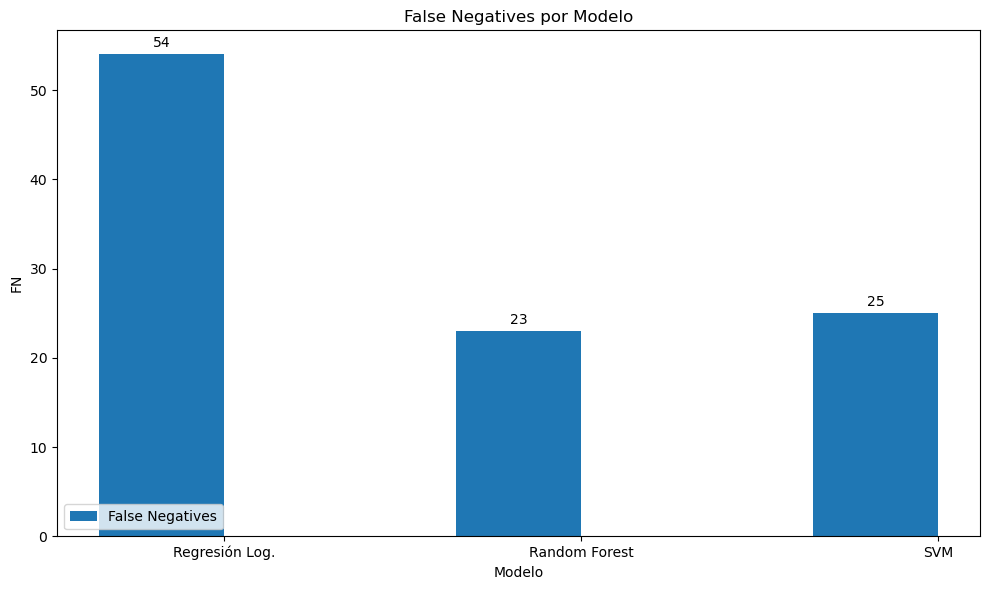

In [35]:
fn_reg_log = 54
fn_rf = 23
fn_svm = 25

import matplotlib.pyplot as plt

# Modelos
modelos = ['Regresión Log.', 'Random Forest', 'SVM']

# FN para cada modelo
FalseNegatives = [fn_reg_log, fn_rf, fn_svm]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(modelos))

# Barras para accuracy en train
plt.bar(index, FalseNegatives, bar_width, label='False Negatives')

# Añadimos etiquetas con los valores
for i in index:
    plt.text(i, FalseNegatives[i] + 0.5, str(FalseNegatives[i]), ha='center', va='bottom')

# Añadimos título y leyenda
plt.title('False Negatives por Modelo')
plt.xlabel('Modelo')
plt.ylabel('FN')
plt.xticks([i + bar_width / 2 for i in index], modelos)
plt.legend(loc='lower left')

# Gráfico
plt.tight_layout()
plt.show()


Atendiendo a los 2 gráficos con métricas de error que acabamos de obtener, **concluimos que los 3 tienen un muy buen rendimiento pese a ser tan solo modelos de Machine Learning** (y no todavía Deep Learning).

No obstante, entre los 3 modelos entrenados, **nos quedamos con el Random Forest**, pues es este modelo el que menos fallos de tipo `Error II`comete (menos noticias fake clasificadas como noticias reales).

---
---

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Referencias:</h2>
</div>


[1] Seobility. (s. f.). ¿Qué es el Stemming? - Seobility Wiki. https://www.seobility.net/es/wiki/Stemming

[2] Data, S. B. (2019, 23 diciembre). Machine Learning Procesamiento de texto – sitiobigdata.com. https://sitiobigdata.com/2019/12/23/machine-learning-procesamiento-de-texto/

[3] Regresión logística Python. (s. f.). https://cienciadedatos.net/documentos/py17-regresion-logistica-python.html

[4] Daniel. (2023, 30 octubre). Random Forest: Bosque aleatorio. Definición y funcionamiento. Formación En Ciencia de Datos | DataScientest.com. https://datascientest.com/es/random-forest-bosque-aleatorio-definicion-y-funcionamiento

[5] Support Vector Machine (SVM). (s. f.). MATLAB & Simulink. https://es.mathworks.com/discovery/support-vector-machine.html